## Name : Adwaiy Singh
## Reg. No. : 220968424
## Sec. : A
## Batch: 2

# Week 6
## Naive Bayes

### 1. Import libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import *

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

### 2. Import dataset 

In [50]:
df = pd.read_csv(("NB1.csv"), names=['age', 'work', 'fnlwgt', 'education', 'education-num', 
    'marital-status', 'occupation', 'relationship', 'race', 'sex', 'gain', 'loss', 'hpw', 
    'country', 'income'], header=0)
df.head()

,age,work,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,gain,loss,hpw,country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### 3. Explore the data to gain insights about the data 
##### View dimension

In [51]:
df.shape

(32560, 15)

##### rename column names

In [52]:
df.set_axis(['age', 'work', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'gain', 'loss', 'hpw', 'country', 'income'], axis='columns')
df.head()

,age,work,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,gain,loss,hpw,country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


##### Explore categorical variables and view them

In [53]:
numCol = list(df._get_numeric_data().columns)
catCol = list(set(df.columns) - set(numCol))
catCol

['education',
 'relationship',
 'country',
 'marital-status',
 'work',
 'sex',
 'occupation',
 'race',
 'income']

##### check missing values in categorical variables

In [54]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df = df.replace('?', np.nan)
for col in catCol:
    print(col, '=', df[col].isnull().sum())

education = 0
relationship = 0
country = 583
marital-status = 0
work = 1836
sex = 0
occupation = 1843
race = 0
income = 0


##### view frequency counts of values in categorical variables
##### view frequency distribution of categorical variables

In [55]:
for col in catCol:
    print(col, '\n', df[col].value_counts(), '\n')

education 
 HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64 

relationship 
 Husband           13193
Not-in-family      8304
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64 

country 
 United-States                 29169
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
Sout

##### Explore workclass variable -  
##### check labels in the workclass variable 
##### check the frequency distribution of values in the workclass variable 
##### replace '?' values in the workclass variable with `NaN`

In [56]:
print(df['work'].value_counts())
print("\nNo. of null val. =",df['work'].isnull().sum())
df['work'] = df['work'].replace('?', np.nan)

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: work, dtype: int64

No. of null val. = 1836


##### Explore occupation variable 
##### check the frequency distribution of values in the occupation variable 
##### replace '?' values in occupation variable with `NaN`

In [57]:
print(df['occupation'].value_counts())
print("\nNo. of null val. =",df['occupation'].isnull().sum())
df['occupation'] = df['occupation'].replace('?', np.nan)

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

No. of null val. = 1843


##### Explore native_country variable 
##### check labels in the native_country variable 
##### check the frequency distribution of values in the native_country variable 
##### replace '?' values in the native_country variable with `NaN`

In [58]:
print(df['country'].value_counts())
print("\nNo. of null val. =",df['country'].isnull().sum())
df['country'] = df['country'].replace('?', np.nan)

United-States                 29169
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

##### Check missing values in categorical variables again

In [59]:
df.isnull().sum()

age                  0
work              1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
gain                 0
loss                 0
hpw                  0
country            583
income               0
dtype: int64

##### Explore Numerical Variables 
##### view the numerical variables 
##### check missing values in numerical variables

In [60]:
for col in numCol:
    print(col, '\n', df[col].value_counts(), '\n')

age 
 36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64 

fnlwgt 
 164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: fnlwgt, Length: 21647, dtype: int64 

education-num 
 9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64 

gain 
 0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: gain, Length: 119, dtype: int64 

loss 
 0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: loss, Length: 92, dtype: in

In [61]:
for col in numCol:
    print(col, '=', df[col].isnull().sum())

age = 0
fnlwgt = 0
education-num = 0
gain = 0
loss = 0
hpw = 0


### 4. Declare feature vector and target variable 

In [62]:
x = df.drop('income', axis=1)
y = df['income']
print(x)
print(y)

       age              work  fnlwgt   education  education-num  \
0       50  Self-emp-not-inc   83311   Bachelors             13   
1       38           Private  215646     HS-grad              9   
2       53           Private  234721        11th              7   
3       28           Private  338409   Bachelors             13   
4       37           Private  284582     Masters             14   
...    ...               ...     ...         ...            ...   
32555   27           Private  257302  Assoc-acdm             12   
32556   40           Private  154374     HS-grad              9   
32557   58           Private  151910     HS-grad              9   
32558   22           Private  201490     HS-grad              9   
32559   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0      Married-civ-spouse    Exec-managerial        Husband  White    Male   
1                Divorced  Handlers-cle

### 5. Split data into separate training and test set

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### 6. print the percentage of missing values in the categorical variables in the training set

In [64]:
for col in catCol:
    if (col != 'income'):
        print(col, '=', x_train[col].isnull().sum() * 100 / x_train[col].count())

education = 0.0
relationship = 0.0
country = 1.763629057463053
marital-status = 0.0
work = 6.093189964157706
sex = 0.0
occupation = 6.122829072961773
race = 0.0


### 7. print categorical variables with missing data

In [65]:
for col in catCol:
    if (col != 'income' and x[col].isnull().sum() != 0):
        print(col, '=', x[col].isnull().sum())

country = 583
work = 1836
occupation = 1843


### 8. impute missing categorical variables with the most frequent value

In [66]:
x_train = x_train.apply(lambda x: x.fillna(x.value_counts().index[0]))
x_test = x_test.apply(lambda x: x.fillna(x.value_counts().index[0]))

### 9. Encode categorical variables

In [67]:
le = LabelEncoder()
for col in catCol:
    if (col != "income"):
        x_train[col] = le.fit_transform(x_train[col])
        x_test[col] = le.transform(x_test[col])
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

### 10. Feature Scaling

In [68]:
scaler = MinMaxScaler()
x_train[numCol] = scaler.fit_transform(x_train[numCol])
x_test[numCol] = scaler.transform(x_test[numCol])

### 11. Model training

In [69]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

### 12. Predict the results

In [70]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)
print(y_pred_test)

[0 0 0 ... 0 0 0]


### 13. Check the accuracy score

In [71]:
acc_test = accuracy_score(y_test, y_pred_test)
print(acc_test)

0.8100941850941851


### 14. Compare the train-set and test-set accuracy

In [72]:
acc_train = accuracy_score(y_train, y_pred_train)
print("Train Accuracy =", acc_train)
print("Test Accuracy =", acc_test)

Train Accuracy = 0.808968058968059
Test Accuracy = 0.8100941850941851


### 15. Visualize confusion matrix with seaborn heatmap

<AxesSubplot:>

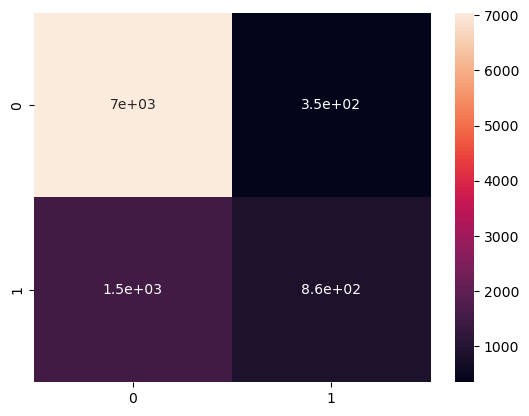

In [73]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True)

### 16. Generate Classification Report

In [74]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7395
           1       0.71      0.36      0.48      2373

    accuracy                           0.81      9768
   macro avg       0.77      0.66      0.68      9768
weighted avg       0.80      0.81      0.79      9768



### 17. Evaluate Classification accuracy

In [75]:
print("Classification accuracy =", acc_test)

Classification accuracy = 0.8100941850941851


### 18. Evaluate Classification error

In [76]:
print("Classification error =", 1 - acc_test)

Classification error = 0.18990581490581493


### 19. Calculate class probabilities and store the probabilities in data frame with appropriate heading

In [77]:
class_prob = gnb.predict_proba(x_test)
class_prob_df = pd.DataFrame(class_prob, columns=gnb.classes_)
print(class_prob_df)

             0             1
0     0.999969  3.064963e-05
1     0.996756  3.244373e-03
2     0.945688  5.431223e-02
3     0.931446  6.855402e-02
4     0.999994  6.308066e-06
...        ...           ...
9763  1.000000  9.047500e-08
9764  0.994858  5.141547e-03
9765  0.928891  7.110854e-02
9766  0.999591  4.091542e-04
9767  0.999998  2.043893e-06

[9768 rows x 2 columns]


### 20. Plot histogram of predicted probabilities

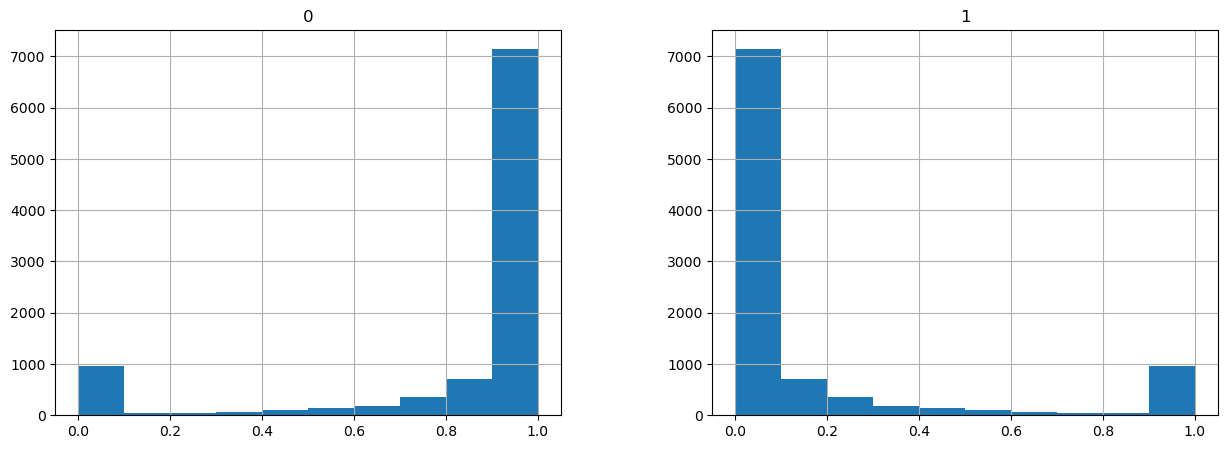

In [78]:
class_prob_df.hist(figsize=(15,5))
plt.show()

### 21. Plot ROC Curve

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


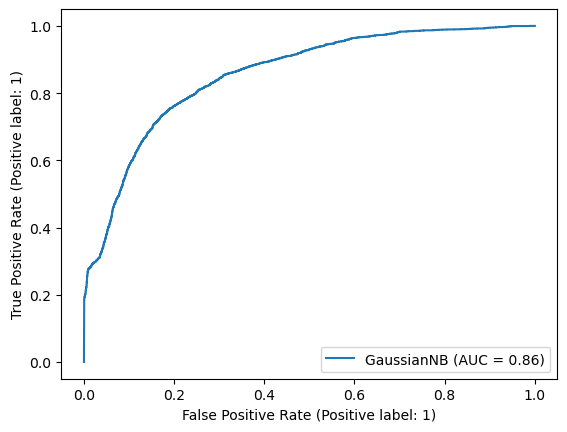

In [79]:
plot_roc_curve(gnb, x_test, y_test)

### 22. Compute ROC AUC

In [80]:
roc_auc_score(y_test, class_prob[:, 1])

0.855699842748614

### 23. Calculate cross-validated ROC AUC

In [81]:
x_test_df = pd.DataFrame(x_test)
x_train_df = pd.DataFrame(x_train)
y_test_df = pd.Series(y_test)
y_train_df = pd.Series(y_train)

x = pd.concat([x_test_df, x_train_df])
y = pd.concat([y_test_df, y_train_df])

In [82]:
cross_val_scores = cross_val_score(gnb, x_train, y_train, cv=5, scoring='roc_auc')
print(cross_val_scores)

[0.85762667 0.86380467 0.85530933 0.85283762 0.85770696]


### 24. Applying 10-Fold Cross Validation

In [83]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cross_val_scores = cross_val_score(gnb, x, y, cv=cv, scoring='roc_auc')
print(cross_val_scores)

[0.85259447 0.84624633 0.86445073 0.85910462 0.85054189 0.85375672
 0.85863276 0.85742691 0.8626484  0.85395376]


### 25. Compute the Average cross-validation score

In [84]:
cross_val_scores.mean()

0.8559356569085992